In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
os.chdir('./drive/My Drive/Tropical_Cyclones_Thesis/ERA5_Dataset')

In [6]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

In [7]:
df_target = pd.read_csv('./DATASET_COMPLETED/old_dataset/tc_act_sind.csv')
df_target = df_target.rename(columns={'Unnamed: 0':'DATE'})
df_target['MONTH'] = pd.to_datetime(df_target['DATE']).dt.month
df_target = df_target.set_index('DATE')
df_target

,S.IndAll,S.IndGen,MONTH
DATE,,,
1980-01-01,0.00,0.0,1
1980-01-02,0.00,0.0,1
1980-01-03,0.00,0.0,1
1980-01-04,0.00,0.0,1
1980-01-05,0.00,0.0,1
...,...,...,...
2022-03-23,0.50,1.0,3
2022-03-24,1.00,0.0,3
2022-03-25,1.00,0.0,3


In [8]:
# Count the number of elements with the same value of S.IndAll for each month
df_filtered = df_target[df_target['S.IndAll'] > 0]
result = df_filtered.groupby(['MONTH', 'S.IndAll'])['S.IndAll'].count().unstack()

# Print the result
result

S.IndAll,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00
MONTH,,,,,,,,,,,,
1,49.0,48.0,46.0,275.0,18.0,23.0,10.0,34.0,1.0,1.0,1.0,1.0
2,58.0,52.0,45.0,260.0,12.0,15.0,18.0,48.0,4.0,2.0,2.0,1.0
3,42.0,28.0,31.0,269.0,12.0,9.0,10.0,23.0,1.0,NaN,NaN,NaN
4,24.0,25.0,27.0,153.0,5.0,1.0,NaN,7.0,NaN,1.0,NaN,NaN
5,14.0,9.0,2.0,30.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.0,2.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3.0,3.0,3.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Count the number of elements with the same value of S.IndAll for each month
df_filtered = df_target[df_target['S.IndGen'] > 0]
result = df_filtered.groupby(['MONTH', 'S.IndGen'])['S.IndGen'].count().unstack()

# Print the result
result

S.IndGen,1.0,2.0
MONTH,,
1,92.0,3.0
2,85.0,5.0
3,61.0,1.0
4,34.0,2.0
5,11.0,NaN
6,2.0,NaN
7,5.0,NaN
8,1.0,NaN
9,7.0,NaN


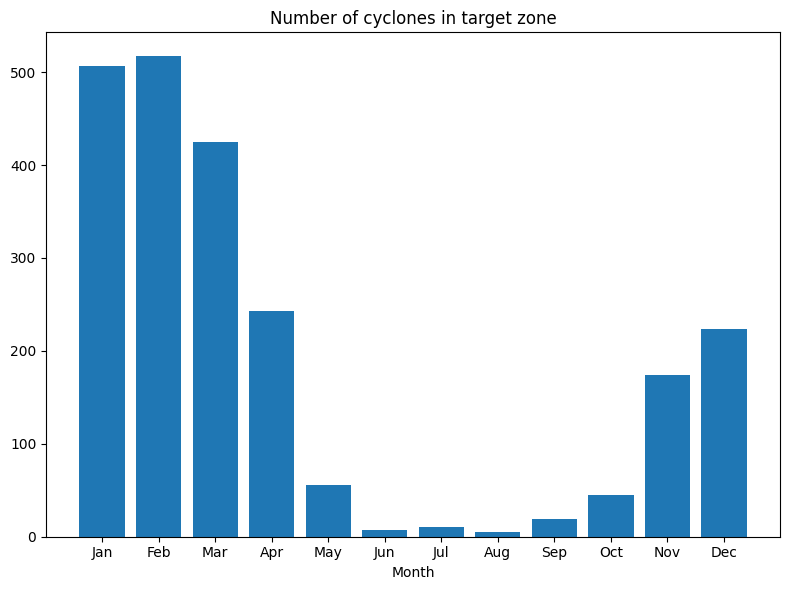

In [10]:
# Assuming 'result' is the Series containing counts for each month
df_filtered = df_target[df_target['S.IndAll'] > 0]
result = df_filtered.groupby('MONTH')['S.IndAll'].count()

# Extract month names and counts
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep', 'Oct', 'Nov', 'Dec']
count_all = result.to_numpy()

# Create the plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

# Plot bars
plt.bar(month_names, count_all, color='C0')

# Add labels and title
plt.xlabel("Month")
plt.ylabel("")
plt.title("Number of cyclones in target zone")

# Customize x-axis ticks (optional)
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

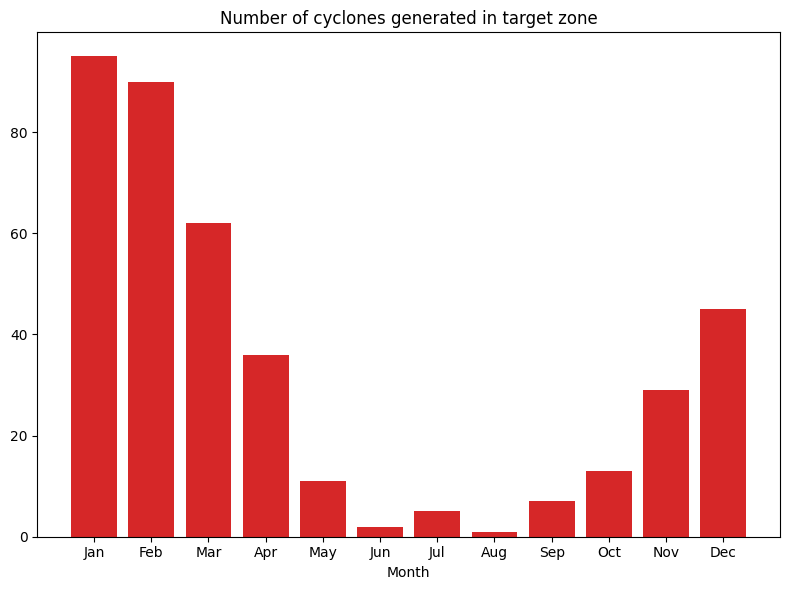

In [11]:
# Assuming 'result' is the Series containing counts for each month
df_filtered = df_target[df_target['S.IndGen'] > 0]
result = df_filtered.groupby('MONTH')['S.IndGen'].count()

# Extract month names and counts
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep', 'Oct', 'Nov', 'Dec']
count_gen = result.to_numpy()

# Create the plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

# Plot bars
plt.bar(month_names, count_gen, color='C3')

# Add labels and title
plt.xlabel("Month")
plt.ylabel("")
plt.title("Number of cyclones generated in target zone")

# Customize x-axis ticks (optional)
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

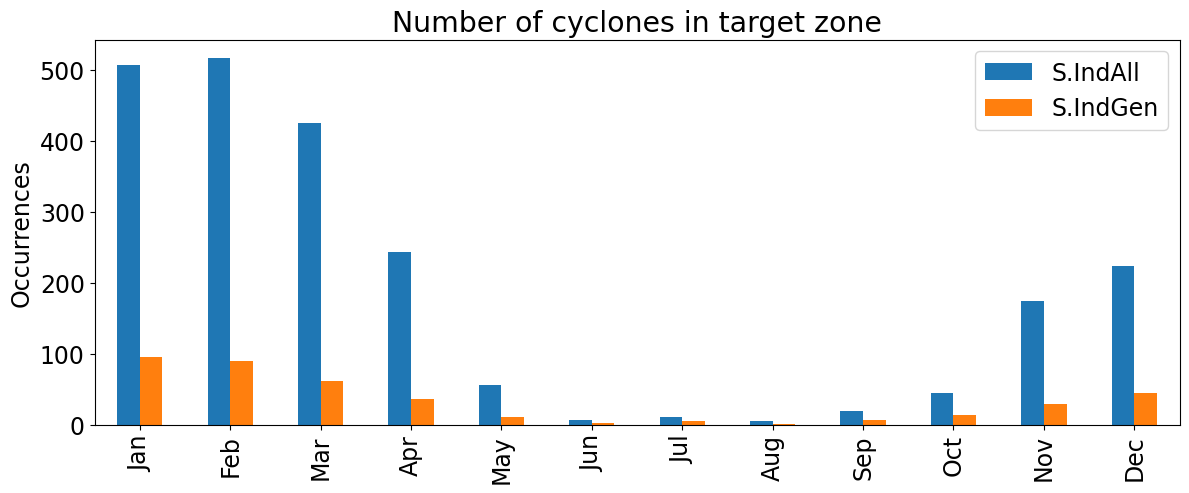

In [12]:
# Define Data

data = {'S.IndAll': count_all,
        'S.IndGen': count_gen}
df = pd.DataFrame(data,columns=['S.IndAll','S.IndGen'], index = month_names)

# Multiple bar chart
plt.rcParams.update({'font.size': 17})
df.plot.bar(figsize=(14, 5))

# Display
#plt.xlabel("Months")
plt.ylabel("Occurrences")
plt.title("Number of cyclones in target zone")

plt.show()

In [13]:
target_arr = df_target.values
# [S.IndAll S.IndGen MONTH]
i = 0
tc_durations = []
tc_nongen = []
while i < len(target_arr):
  count = 0
  month = int(target_arr[i][2])
  if target_arr[i][1] == 1:
    while i < len(target_arr) and target_arr[i][0] > 0:
      count+=1
      i+=1
    tc_durations.append([month,count])
  elif target_arr[i][1] == 0 and target_arr[i][0] > 0:
    while i < len(target_arr) and target_arr[i][0] > 0:
      count+=1
      i+=1
    tc_nongen.append([month,count])

  i+=1

print(len(tc_durations))
print(len(tc_nongen))

298
95


In [14]:
tc_generated = np.array(tc_durations)
df_tc_gen = pd.DataFrame(tc_generated, columns=['MONTH', 'TC_GEN_PERIOD'])
df_tc_gen.describe()

,MONTH,TC_GEN_PERIOD
count,298.000000,298.000000
mean,5.000000,5.885906
std,4.139812,4.214821
min,1.000000,1.000000
25%,2.000000,2.250000
50%,3.000000,5.000000
75%,10.000000,8.000000
max,12.000000,25.000000


In [15]:
tc_non_generated = np.array(tc_nongen)
df_tc_nongen = pd.DataFrame(tc_non_generated, columns=['MONTH', 'TC_NONGEN_PERIOD'])
df_tc_nongen.describe()

,MONTH,TC_NONGEN_PERIOD
count,95.000000,95.000000
mean,5.421053,4.947368
std,4.328478,3.987663
min,1.000000,1.000000
25%,2.000000,2.000000
50%,3.000000,3.000000
75%,11.000000,7.000000
max,12.000000,17.000000


In [16]:
# Evaluate the mean number of cyclones in a year

# Consider only samples from 01-01-1980 to 31-12-2021 (42 years)

def count_tcs_year(start_y: str, end_y: str) -> int:
  df_filtered = df_target[df_target.index > start_y]
  df_filtered = df_filtered[df_filtered.index < end_y]
  samples = df_filtered.values
  count_tot_tcs = 0
  for elem in samples:
    if elem[0] > 0:
      count_tot_tcs += 1
  return count_tot_tcs

tc_year = {}
for year in range(1980, 2022):
  tc_year[str(year)] = count_tcs_year(str(year), str(year+1))

print(tc_year)

{'1980': 47, '1981': 60, '1982': 55, '1983': 40, '1984': 71, '1985': 62, '1986': 65, '1987': 62, '1988': 66, '1989': 66, '1990': 46, '1991': 46, '1992': 36, '1993': 47, '1994': 73, '1995': 57, '1996': 77, '1997': 46, '1998': 31, '1999': 29, '2000': 61, '2001': 49, '2002': 82, '2003': 68, '2004': 64, '2005': 37, '2006': 37, '2007': 56, '2008': 44, '2009': 48, '2010': 32, '2011': 21, '2012': 66, '2013': 52, '2014': 40, '2015': 51, '2016': 49, '2017': 22, '2018': 73, '2019': 63, '2020': 50, '2021': 42}


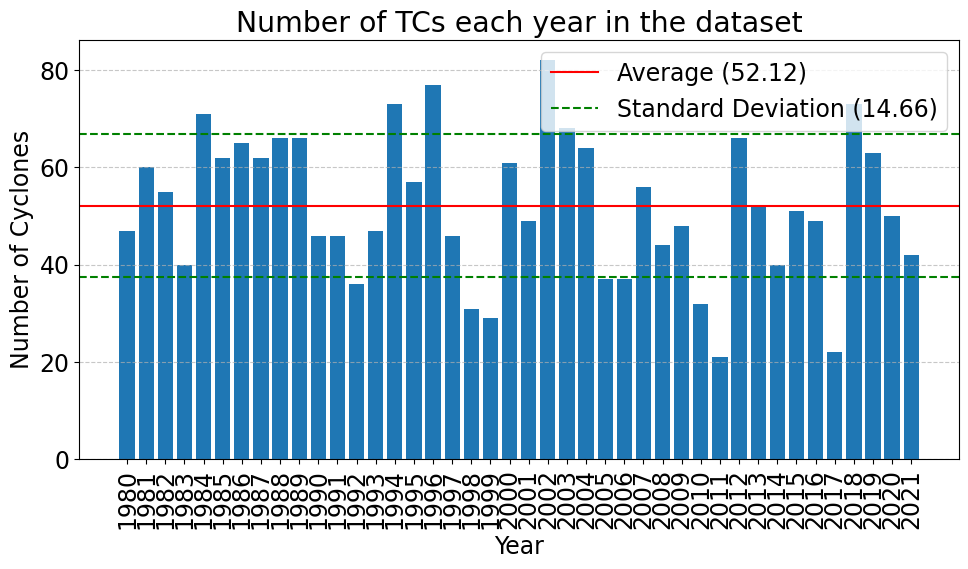

In [17]:
# Calculate average and standard deviation
avg_value = np.mean(list(tc_year.values()))
std_dev = np.std(list(tc_year.values()))

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(tc_year)), list(tc_year.values()), align='center', color='C0')
plt.xticks(range(len(tc_year)), list(tc_year.keys()), rotation=90)

# Plot the average value
plt.axhline(y=avg_value, color='r', linestyle='-', label=f'Average ({avg_value:.2f})')

# Plot the standard deviation
plt.axhline(y=avg_value + std_dev, color='g', linestyle='--', label=f'Standard Deviation ({std_dev:.2f})')
plt.axhline(y=avg_value - std_dev, color='g', linestyle='--')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Number of Cyclones')
plt.title('Number of TCs each year in the dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
N_samples = len(df_target)
N_tcs = np.count_nonzero(df_target.values[:,0])
N_nontcs = np.count_nonzero(df_target.values[:,0] == 0)

print('N sampled:        ', N_samples)
print('N TCs:            ', N_tcs)
print('N Non-TCs:        ', N_nontcs)
print('N_samples/N_TCs:  ', N_samples/N_tcs)

N sampled:         15427
N TCs:             2232
N Non-TCs:         13195
N_samples/N_TCs:   6.91173835125448


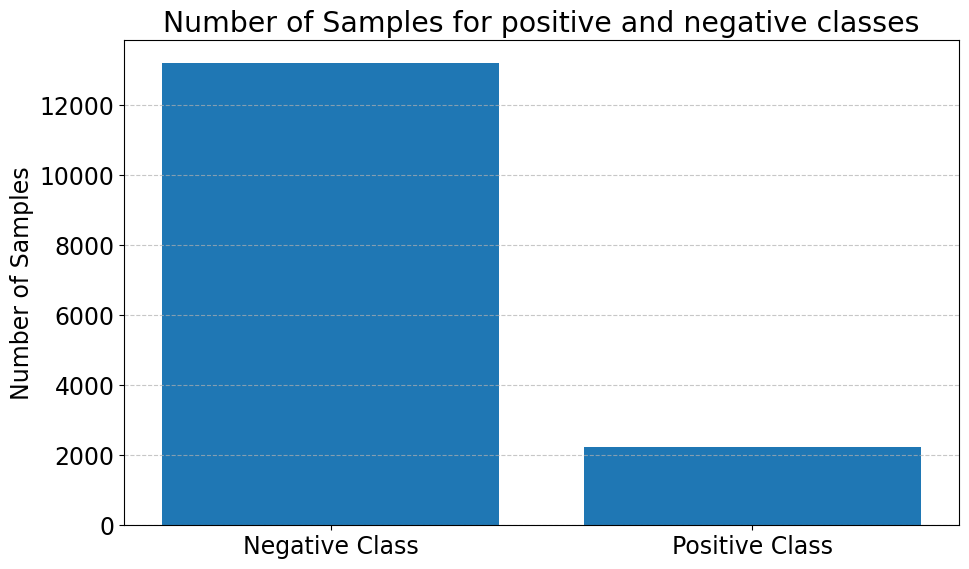

In [19]:
tcs_dict = {'Negative Class': N_nontcs,
            'Positive Class': N_tcs
            }

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 17})

plt.bar(range(len(tcs_dict)), list(tcs_dict.values()), align='center', color='C0')
plt.xticks(range(len(tcs_dict)), list(tcs_dict.keys()), rotation=0)

# Customize the plot
plt.ylabel('Number of Samples')
plt.title('Number of Samples for positive and negative classes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [20]:
df_meteo = pd.read_csv('./DATASET_COMPLETED/ensemble_dataset/ERA5_16zones_WindPressSST.csv')
df_meteo

,DATE,Wind_Mean_Z1-1,Wind_Mean_Z1-2,Wind_Mean_Z1-3,Wind_Mean_Z1-4,Wind_Mean_Z1-5,Wind_Mean_Z1-6,Wind_Mean_Z1-7,Wind_Mean_Z1-8,Wind_Mean_Z1-9,...,SST_Std_Z16-2,SST_Std_Z16-3,SST_Std_Z16-4,SST_Std_Z16-5,SST_Std_Z16-6,SST_Std_Z16-7,SST_Std_Z16-8,SST_Std_Z16-9,SST_Std_Z16-10,SST_Std_Z16-11
0,1980-01-12,5.381555,4.978972,5.478057,5.856111,5.056396,4.986129,4.749358,5.118156,4.906734,...,1.099857,1.124110,0.857042,0.871252,0.683395,0.814945,0.952832,1.098583,1.146924,0.959851
1,1980-01-13,5.792269,5.381555,4.978972,5.478057,5.856111,5.056396,4.986129,4.749358,5.118156,...,1.724398,1.099857,1.124110,0.857042,0.871252,0.683395,0.814945,0.952832,1.098583,1.146924
2,1980-01-14,5.127522,5.792269,5.381555,4.978972,5.478057,5.856111,5.056396,4.986129,4.749358,...,1.500124,1.724398,1.099857,1.124110,0.857042,0.871252,0.683395,0.814945,0.952832,1.098583
3,1980-01-15,5.498013,5.127522,5.792269,5.381555,4.978972,5.478057,5.856111,5.056396,4.986129,...,1.371031,1.500124,1.724398,1.099857,1.124110,0.857042,0.871252,0.683395,0.814945,0.952832
4,1980-01-16,5.236773,5.498013,5.127522,5.792269,5.381555,4.978972,5.478057,5.856111,5.056396,...,1.303748,1.371031,1.500124,1.724398,1.099857,1.124110,0.857042,0.871252,0.683395,0.814945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,2022-03-23,5.072216,4.910853,4.568998,4.175162,4.037687,4.788805,5.140194,4.937949,4.330897,...,1.417400,1.331738,1.603144,1.721354,1.739771,1.451217,1.554403,1.610266,1.715593,1.455799
15412,2022-03-24,5.248760,5.072216,4.910853,4.568998,4.175162,4.037687,4.788805,5.140194,4.937949,...,1.257181,1.417400,1.331738,1.603144,1.721354,1.739771,1.451217,1.554403,1.610266,1.715593
15413,2022-03-25,4.138962,5.248760,5.072216,4.910853,4.568998,4.175162,4.037687,4.788805,5.140194,...,1.253193,1.257181,1.417400,1.331738,1.603144,1.721354,1.739771,1.451217,1.554403,1.610266
15414,2022-03-26,4.439019,4.138962,5.248760,5.072216,4.910853,4.568998,4.175162,4.037687,4.788805,...,1.263836,1.253193,1.257181,1.417400,1.331738,1.603144,1.721354,1.739771,1.451217,1.554403


In [21]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek

df_meteo = df_meteo.set_index('DATE')
X = df_meteo.values
y = df_target['S.IndAll'].values[11:]
y = np.where(y > 0, 1, 0)
print(X.shape, y.shape)

print('Original dataset shape %s' % Counter(y))

smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_res))
#Resampled dataset shape Counter({0: 900, 1: 900})

(15416, 1056) (15416,)
Original dataset shape Counter({0: 13184, 1: 2232})
Resampled dataset shape Counter({0: 13181, 1: 13181})


In [22]:
tcs_dict = Counter(y_res)
print(tcs_dict.keys())
print(tcs_dict)

dict_keys([0, 1])
Counter({0: 13181, 1: 13181})


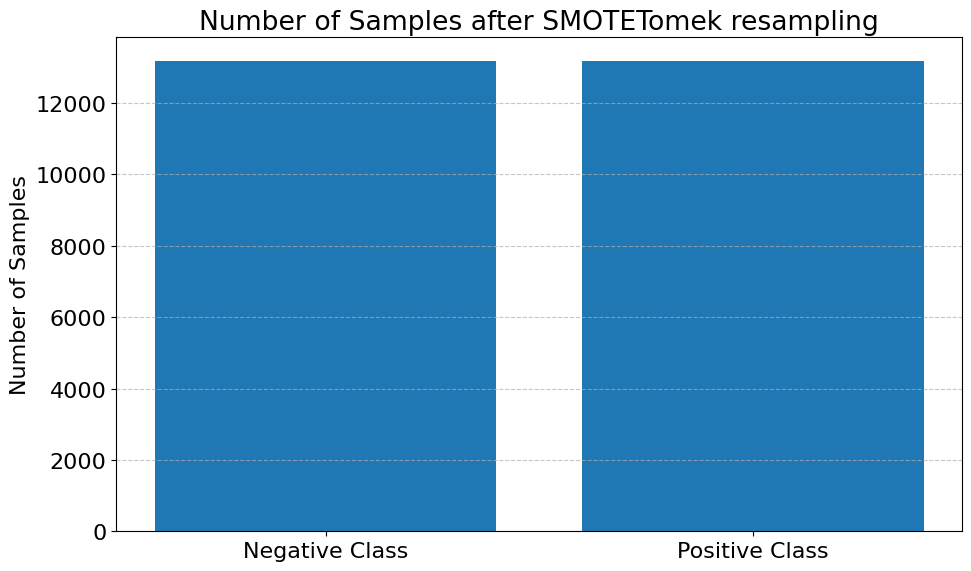

In [23]:
# tcs_dict = {'Negative Class': N_nontcs,
#             'Positive Class': N_tcs
#             }

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 16})
plt.bar(range(len(tcs_dict)), list(tcs_dict.values()), align='center', color='C0')
plt.xticks(range(len(tcs_dict)), ['Negative Class', 'Positive Class'], rotation=0)

# Customize the plot
plt.ylabel('Number of Samples')
plt.title('Number of Samples after SMOTETomek resampling')
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [33]:
sindall = df_target['S.IndAll'].values
sindgen = df_target['S.IndGen'].values
dates = df_target.index

print(sindall.shape, sindgen.shape, dates.shape)
count = 0

for i in range(sindall.shape[0]):
  if sindgen[i] > 0 and sindall[i+1] == 0:
    count += 1
    print('INDEX: ', i)
    print('DATE: ', dates[i])
    print('-------------------')

print(count)

(15427,) (15427,) (15427,)
INDEX:  2916
DATE:  1987-12-26
-------------------
INDEX:  3311
DATE:  1989-01-24
-------------------
INDEX:  3719
DATE:  1990-03-08
-------------------
INDEX:  3757
DATE:  1990-04-15
-------------------
INDEX:  3989
DATE:  1990-12-03
-------------------
INDEX:  4344
DATE:  1991-11-23
-------------------
INDEX:  4743
DATE:  1992-12-26
-------------------
INDEX:  4801
DATE:  1993-02-22
-------------------
INDEX:  5095
DATE:  1993-12-13
-------------------
INDEX:  5440
DATE:  1994-11-23
-------------------
INDEX:  6777
DATE:  1998-07-22
-------------------
INDEX:  6846
DATE:  1998-09-29
-------------------
INDEX:  7336
DATE:  2000-02-01
-------------------
INDEX:  7621
DATE:  2000-11-12
-------------------
INDEX:  7704
DATE:  2001-02-03
-------------------
INDEX:  7949
DATE:  2001-10-06
-------------------
INDEX:  8500
DATE:  2003-04-10
-------------------
INDEX:  9010
DATE:  2004-09-01
-------------------
INDEX:  9159
DATE:  2005-01-28
-------------------
INDE

In [40]:
df_tc = pd.read_csv('../IBTrACS_Dataset/dataset/ibtracs_original_SI.csv')
df_tc = df_tc[df_tc['ISO_TIME'] > '1980']

<ipython-input-40-0c73ed1fea9e>:1: DtypeWarning: Columns (1,2,8,9,14,19,20,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tc = pd.read_csv('../IBTrACS_Dataset/dataset/ibtracs_original_SI.csv')


In [49]:
df_tc[df_tc['ISO_TIME'] > '2003-04-10'][:10]

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
142410,2003098S23041,2003,24,SI,MM,LUMA,2003-04-10 00:00:00,SS,-27.0,43.2,...,,,,,,,,,18,125
142411,2003098S23041,2003,24,SI,MM,LUMA,2003-04-10 03:00:00,SS,-27.4844,44.0713,...,,,,,,,,,19,122
142412,2003098S23041,2003,24,SI,MM,LUMA,2003-04-10 06:00:00,SS,-28.0,45.0,...,,,,,,,,,20,124
142413,2003098S23041,2003,24,SI,MM,LUMA,2003-04-10 09:00:00,SS,-28.606,45.9406,...,,,,,,,,,21,124
142414,2003098S23041,2003,24,SI,MM,LUMA,2003-04-10 12:00:00,SS,-29.2,47.0,...,,,,,,,,,23,118
142415,2003098S23041,2003,24,SI,MM,LUMA,2003-04-10 15:00:00,SS,-29.6565,48.2275,...,,,,,,,,,24,112
142416,2003098S23041,2003,24,SI,MM,LUMA,2003-04-10 18:00:00,SS,-30.1,49.6,...,,,,,,,,,26,112
142417,2003098S23041,2003,24,SI,MM,LUMA,2003-04-10 21:00:00,SS,-30.6183,51.0421,...,,,,,,,,,28,113
142418,2003098S23041,2003,24,SI,MM,LUMA,2003-04-11 00:00:00,SS,-31.2,52.6,...,,,,,,,,,30,114
142419,2003098S23041,2003,24,SI,MM,LUMA,2003-04-11 03:00:00,SS,-31.8015,54.2148,...,,,,,,,,,32,114


In [52]:
df_tc[df_tc['NAME'] == 'LUMA']

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
142394,2003098S23041,2003,24,SI,MM,LUMA,2003-04-08 00:00:00,TS,-23.4,40.7,...,,,,,,,,,9,0
142395,2003098S23041,2003,24,SI,MM,LUMA,2003-04-08 03:00:00,TS,-23.8324,40.7045,...,,,,,,,,,9,185
142396,2003098S23041,2003,24,SI,MM,LUMA,2003-04-08 06:00:00,TS,-24.3,40.6,...,,,,,,,,,10,200
142397,2003098S23041,2003,24,SI,MM,LUMA,2003-04-08 09:00:00,TS,-24.8027,40.3232,...,,,,,,,,,11,211
142398,2003098S23041,2003,24,SI,MM,LUMA,2003-04-08 12:00:00,TS,-25.2,40.0,...,,,,,,,,,7,222
142399,2003098S23041,2003,24,SI,MM,LUMA,2003-04-08 15:00:00,TS,-25.3524,39.7771,...,,,,,,,,,4,241
142400,2003098S23041,2003,24,SI,MM,LUMA,2003-04-08 18:00:00,SS,-25.4,39.6,...,,,,,,,,,3,245
142401,2003098S23041,2003,24,SI,MM,LUMA,2003-04-08 21:00:00,SS,-25.5,39.4275,...,,,,,,,,,3,234
142402,2003098S23041,2003,24,SI,MM,LUMA,2003-04-09 00:00:00,SS,-25.6,39.3,...,,,,,,,,,3,227
142403,2003098S23041,2003,24,SI,MM,LUMA,2003-04-09 03:00:00,SS,-25.7223,39.16,...,,,,,,,,,2,205
